# Post-Industrial sea level plot
This script downloads and plots the data from:
> Frederikse, T., Landerer, F., Caron, L. et al. The causes of sea-level rise since 1900. Nature 584, 393–397 (2020). https://doi.org/10.1038/s41586-020-2591-3

Data is downloaded from:
> Thomas Frederikse, Felix Landerer, Lambert Caron, Surendra Adhikari, David Parkes, Vincent W. Humphrey, … Yun-Hao Wu. (2020). data supplement of "The causes of sea-level rise since 1900" [Data set]. Zenodo. http://doi.org/10.5281/zenodo.3862995



In [1]:
import pandas as pd
from urllib.request import urlopen
import matplotlib.pyplot as plt
import datetime as DT
import seaborn as sns
import numpy as np

ModuleNotFoundError: No module named 'seaborn'

In [2]:
url='https://zenodo.org/record/3862995/files/global_basin_timeseries.xlsx?download=1'
data = pd.read_excel(url,sheet_name='Global')
data = data.rename(columns={'Unnamed: 0': 'Year'})

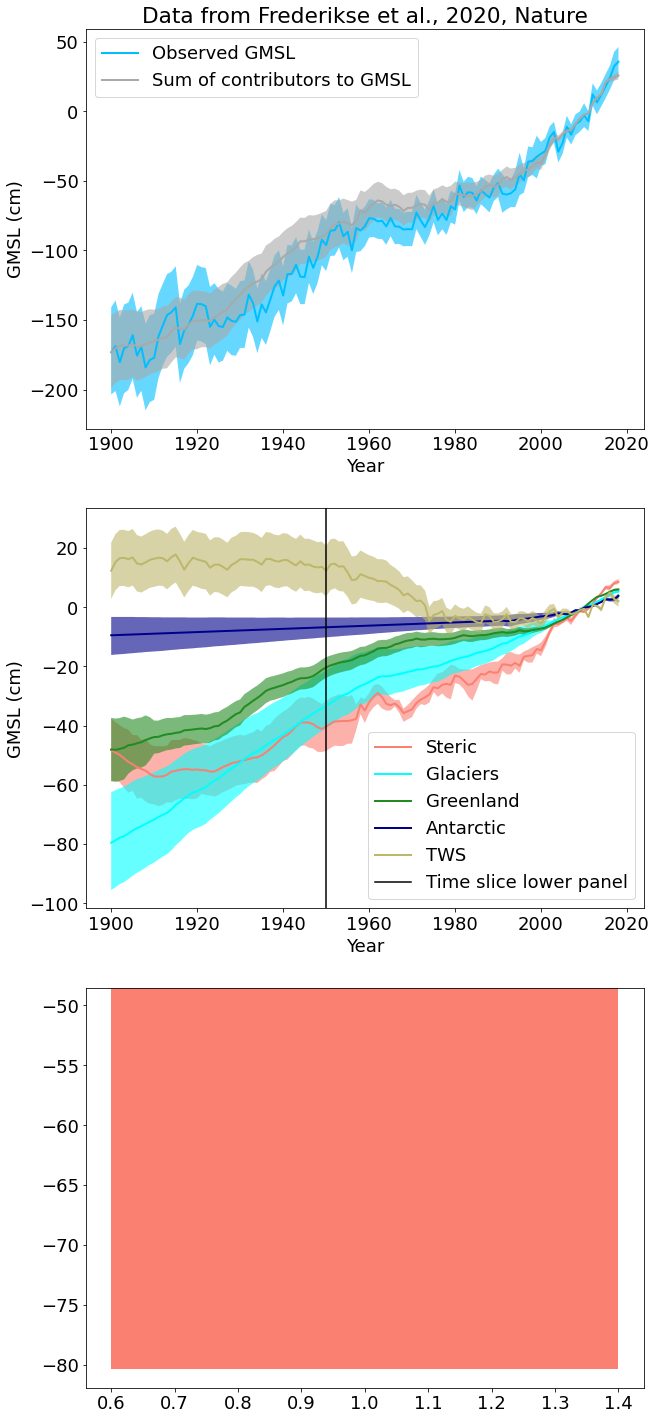

In [33]:
fig, (ax1,ax2) = plt.subplots(3,figsize=(10,25))
plt.rcParams.update({'font.size': 18})
#Plot GMSL observed
ax1.fill_between('Year', 'Observed GMSL [upper]','Observed GMSL [lower]', data=data, facecolor='deepskyblue', alpha=0.6)
ax1.plot( 'Year', 'Observed GMSL [mean]', data=data, color='deepskyblue', linewidth=2,label='Observed GMSL')
ax1.set_title('Data from Frederikse et al., 2020, Nature')
#Plot sum of contributions
ax1.fill_between('Year', 'Sum of contributors [upper]','Sum of contributors [lower]', data=data, facecolor='darkgrey', alpha=0.6)
ax1.plot( 'Year', 'Sum of contributors [mean]', data=data, color='darkgrey', linewidth=2,label='Sum of contributors to GMSL')
legend=ax1.legend(loc='best')

#Set labels
ax1.set(xlabel='Year', ylabel='GMSL (cm)')
#Steric
ax2.fill_between('Year', 'Steric [upper]','Steric [lower]', data=data, facecolor='salmon', alpha=0.6)
ax2.plot( 'Year', 'Steric [mean]', data=data, color='salmon', linewidth=2,label='Steric')

#Glaciers
ax2.fill_between('Year', 'Glaciers [upper]','Glaciers [lower]', data=data, facecolor='aqua', alpha=0.6)
ax2.plot( 'Year', 'Glaciers [mean]', data=data, color='aqua', linewidth=2,label='Glaciers')

#Greenland
ax2.fill_between('Year', 'Greenland Ice Sheet [upper]','Greenland Ice Sheet [lower]', data=data, facecolor='forestgreen', alpha=0.6)
ax2.plot( 'Year', 'Greenland Ice Sheet [mean]', data=data, color='forestgreen', linewidth=2,label='Greenland')

#Antarctica
ax2.fill_between('Year', 'Antarctic Ice Sheet [upper]','Antarctic Ice Sheet [lower]', data=data, facecolor='darkblue', alpha=0.6)
ax2.plot( 'Year', 'Antarctic Ice Sheet [mean]', data=data, color='darkblue', linewidth=2,label='Antarctic')

#Terrestrial water storage
ax2.fill_between('Year', 'Terrestrial Water Storage [upper]','Terrestrial Water Storage [lower]', data=data, facecolor='darkkhaki', alpha=0.6)
ax2.plot( 'Year', 'Terrestrial Water Storage [mean]', data=data, color='darkkhaki', linewidth=2,label='TWS')

# Insert vertical line for the legend
ax2.axvline(x=time, color='k', linestyle='-',zorder=200,label='Time slice lower panel')

legend=ax2.legend(loc='best')
ax2.set(xlabel='Year', ylabel='GMSL (cm)')

plt.savefig('slplot.jpg', dpi=300,format='jpg',transparent=False)
